# Predicting Dementia 

### Application of common supervised learning algorithms to predict dementia.

##### Written by Chance Alvarado:  [LinkedIn](https://www.linkedin.com/in/chance-alvarado/),  [GitHub](https://github.com/chance-alvarado/)

##### Explore the full repository [here](https://github.com/chance-alvarado/dementia-classifier).

<img src='resources/images/brain.jpg' />

Image courtesy of [Unsplash](https://unsplash.com/photos/_af0_qAh4K4).

---

## Table of Contents

- [Introduction](#intro)
- [Setup, Data Cleaning, and Preperation](#setup)
    - [Introduction to the Data](#data)
    - [Imports](#imports)
    - [DataFrame Construction](#construction)
    - [Merging DataFrames](#merging)
    - [Cleaning the Data](#cleaning)
- [Data Visualization](#visualization)
    - [Breakdown of Sexes for Those With and Without Dementia](#sexes)
    - [Density of Male and Female Subjects of Varying Ages ](#sexage)
    - [Density of Varying Features of our Data](#density)
    - [Relationship between Atlas Scaling Factor and Estimated Intracranial Volume](#asf)
    - [Clustering between Varying Features of our Data](#clustering)
- [Making Predictions](#predictions)
    - [Data Preperation](#prep)
    - [Logistic Regression](#logreg)
    - [Support Vector Classifier](#svc)
    - [Random Forest Classifier](#rfc)
- [Conclusions](#conclusions)
    - [Findings](#findings)
    - [Limitations](#limitations)
    - [Further Research](#further)

<a id="intro"></a>

## Introduction

Dementia is a broad term describing a decline in cognitive function. This may include but is not limited to:

- Memory
- Critical thinking
- Language
- Judgment
- Behavior

Dementia itself is not a disease but rather caused by a variety of conditions. The most common of which is Alzheimer's disease, which accounts for between 60 and 80 percent of all cases of dementia. Defining dementia becomes difficult as experts disagree on a concrete criteria and definition.

Healthcare professionals do not have a singular test for dementia. Instead a multitude of tests and exams may be ran. These may include:

- An examination of the patient's medical history
- A physical exam
- Blood testing
- Analyzing changes in memory, behavior, and general cognitive function
- Noting a family history

Dementia is characterized using the **Clinical Dementia Rating** (CDR) scale. This five point scale rates the severity of symptoms and breaks them down as follows:

- 0: None
- 0.5: Questionable
- 1: Mild
- 2: Moderate
- 3: Severe

While no cure for dementia exists, early intervention can slow the progression of symptoms and allow patients to lead a fulfilling life. In this analysis we will examine the medical profile of a multitude of patients to observe if supervised learning models can predict dementia in individuals. This could lead to advancements in early detection and intervention of dementia symptoms in high-risk individuals.

Information above retrieved from [Healthline](https://www.healthline.com/health/dementia).

---


<a id="setup"></a>

## Setup, Data Cleaning, and Preparation

<a id="data"></a>

### Introduction to the Data

Data necessary for this analysis is divided among two csv files and can be found within the `data` folder:
    
- `oasis_cross_sectional`
    - This datasets contains a cross-sectional collection of 416 subjects and their respective medical attributes.

        
- `oasis_longitudinal`
    - This datasets contains a longitudinal collection of 150 subjects and their respective medical attributes. For this analysis only the first visit observation of each subject will be used.

For our purposes not all features in the datasets will be used. The following features will serve as the foundation of our analysis. 

- M/F
    - The sex of our participants. Either *M* for male of *F* female.
- Age
    -  The age of our participants.
- Educ/EDUC
    - The years of formal education the participant has partook in. These values range from 1 to 23. There may be some ambiguity with these values and will be discussed later in the analysis.
- SES
    - An integer value ranging from 1 to 5 noting a subject's socioeconomic status - 1 being the lowest level and 5 being the highest.
- MMSE
    - The subject's score on the Mini Mental State Evaluation. A higher score represents higher cognitive function while a lower score is often associated with some level of cognitive decline. 
- eTIV
    - The subject's estimated total intracranial volume in cubic centimeters.
- nWBV
    - The subject's normalized whole brain volume. The brain volume has been normalized to fall below 1. Normalization technique was not clearly stated. 
- ASF
    - The Atlas Scaling factor is a value used to scale a participant to the atlas target.
- CDR
    - The participant's Clinical Dementia Rating. The score in these datasets range from 0 to 2. This will serve as our primary target once we begin to implement our predictive models.

Acknowledgments to the rights holders can be found in this project's [README](https://github.com/chance-alvarado/dementia-classifier).

##### Relevant paths to data

In [1]:
cross_sectional_path = 'resources/data/oasis_cross-sectional.csv'
longitudinal_path = 'resources/data/oasis_longitudinal.csv'

<a id="imports"></a>

### Imports

The code responsible for cleaning, visualizing, and building predictive model has been refactored and can be found in `resources/dementia_analysis.py`.

- Further explanation on the methods used in this analysis can be found there.
- Feel free to modify and adapt any part of this module for your projects!

##### Import module responsible for data cleaning and visualization from `resources`

In [2]:
from resources import dementia_analysis

DataCleaning = dementia_analysis.DataCleaning()
DataVisualization = dementia_analysis.DataVisualization()
PredictiveModel = dementia_analysis.PredictiveModel()
ResultsVisualization = dementia_analysis.ResultsVisualization()

<a id="construction"></a>

### DataFrame Construction

First we will read in our datasets with _Pandas_ and represent them as DataFrames. Our cross-sectional and longitudinal datasets will be represented as `cs_df` and `l_df`, respectively.

##### Construct DataFrames from longitudinal and cross-sectional datasets

In [3]:
(cs_df, l_df) = DataCleaning.create_dataframes(cross_sectional_path, longitudinal_path)

##### Preview the cross-sectional DataFrame

In [4]:
cs_df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


##### Preview the longitudinal DataFrame

In [5]:
l_df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


<a id="merging"></a>

### Merging DataFrames

For our analysis we are not interested in the longitudinal nature of one of our datasets. We will merge the DataFrames into one using the following processes.

- Grab only the rows corresponding to the first visit from `l_df`.

- Drop irrelevant/different columns from our DataFrames:
    - From `cs_df`:
        - ID
        - Delay
        - Hand
    - From `l_df`:
        - Subject ID
        - MRI ID
        - Group
        - Visit
        - MR Delay
        - Hand
    - Note, *Hand* was dropped as all of our subjects were right-handed.
- Join our DataFrames 

- Rename columns for consistency and ease of use:
    - M/F : sex
    - Age: age
    - Educ: education
    - SES: economic_status
    - MMSE: mental_state_eval
    - CDR: dementia_rating
    - eTIV: intracranial_vol
    - nWBV: brain_vol
    - ASF: scaling_factor


##### Merge cross-sectional and longitudinal DataFrames into a master DataFrame, `df`

In [6]:
df = DataCleaning.create_master_dataframe(cs_df, l_df)

##### Preview the master DataFrame

In [7]:
df.head()

,sex,age,education,economic_status,mental_state_eval,dementia_rating,intracranial_vol,brain_vol,scaling_factor
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


<a id="cleaning"></a>

### Cleaning the Data

To begin an accurate analysis of our data further cleaning is needed. The following changed will be made to our master DataFrame, `df`.

- Remove all rows where our *dementia_rating* column has missing values. Building a predictive model with missing target data could lead to a skewed and inaccurate classifier. This also removes most *NaN* values in our DataFrame.
- Convert the values in our *sex* column to numeric data.
    - M: 1
    - F: 0    
- Replace all remaining *NaN* values with the column median.
- Add a *target* column based on our *dementia_rating* column. This will serve as the target vector when training out models
    - dementia_rating = 0: 0
    - dementia_rating > 0: 1

#####  Clean the data as described above

In [8]:
df = DataCleaning.clean_master_dataframe(df)

##### Preview the cleaned DataFrame

In [9]:
df.head()

,sex,age,education,economic_status,mental_state_eval,dementia_rating,intracranial_vol,brain_vol,scaling_factor,target
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1
3,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
4,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0



---

<a id="visualization"></a>

## Data Visualization

<a id="sexes"></a>

### Analyze the Breakdown of Sexes for Those With and Without Dementia

We begin our analysis by noting the breakdown of sexes of our subjects. We go further by visualizing the breakdown of those with and without dementia. We display this data as a donut plot.

##### Construct and display plot

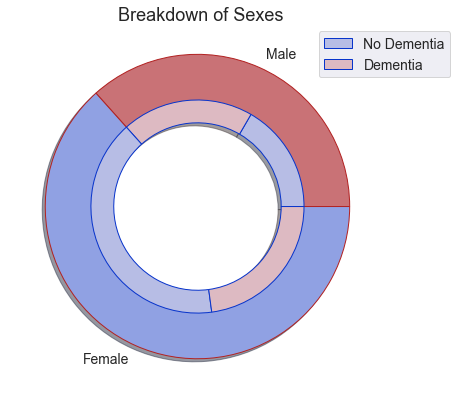

In [10]:
DataVisualization.donut_plot(df)

##### Discussion

Our visualization shows that our dataset has a higher number of female subjects. Furthermore, we note that less than half of female participants have dementia while slightly more than half of our male participants have been classified as having dementia.

<a id="sexage"></a>

### Analyze the Density of Male and Female Subjects of Varying Ages 

Next, we continue our analysis by breaking down our male and female subjects by their age. We visualize this by creating two kernal density estimate (KDE) plots. Each sex-specific plot will show the distribution of those with and without dementia by age.

##### Construct and display plot

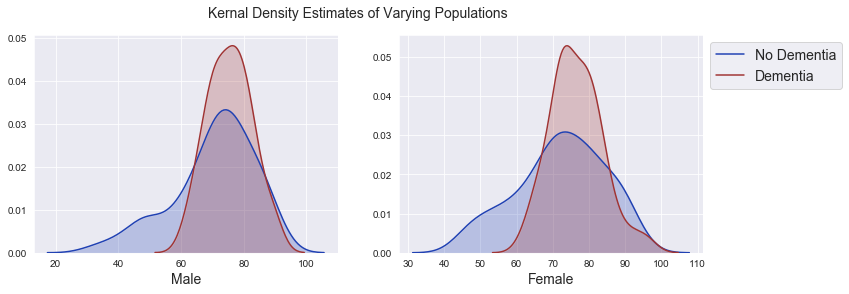

In [11]:
DataVisualization.age_sex_kde_plot(df)

##### Discussion

We see that all all distributions are most concentrated in the ~70s age range. Regardless of gender, there is a significantly higher peak in this age range for those with dementia compared to those without.

<a id="density"></a>

### Analyze the Density of Varying Features of our Data

We further look into the distributions of the features of our data for both those with and without dementia. Here we look at the distribution of age, years of education, socioeconomic status, estimated intracranial volume, normalized whole brain volume and Mini Mental State Evaluation scores.

##### Construct and display plot

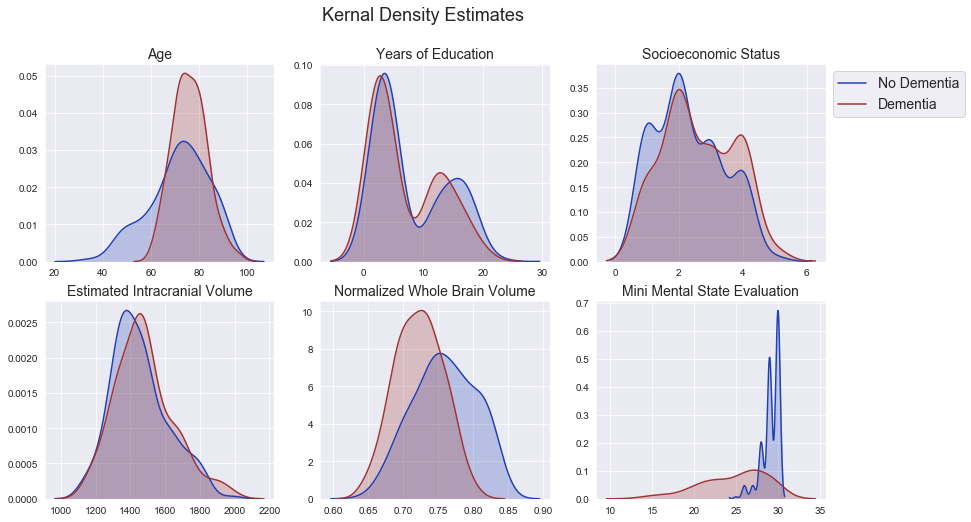

In [12]:
DataVisualization.kde_plot(df)

##### Discussion

Here we see some notable trends in the distributions of multiple features:

- The distribution of ages independent of sex is aligned with previous notes.
- Total years of education seems to follow a bimodal distribution. This may be in discrepancies with reporting (i.e. some participants including high school) or biased samples. 
- There is little difference in the distributions of socioeconomic status between those with and without dementia.
- Similarly, there is little difference in the distribution of estimated intracranial volume between those with and without dementia.
- We note that those with dementia have a distribution of normalized whole brain volumes mostly lower than those without. 
- Those without dementia have a distribution of Mini Mental State Evaluation scores mostly falling between 25 and 30. Those with dementia have more widely distributed scores. 

<a id="asf"></a>

### Analyze the Relationship between Atlas Scaling Factor and Estimated Intracranial Volume

##### Construct and display plot

The Atlas Scaling Factor is used to scale a subject to the atlas target. Since this normalization equates to head size, we can expect a relationship between this and total intracranial volume. To investigate this, we plot participants' Atlas Scaling Factor versus their estimated intracranial volume.

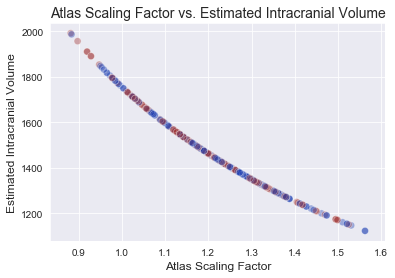

In [13]:
DataVisualization.scatter_plot(df)

##### Discussion

We see that, as expected, there is a strong correlation between these two features. Using both of these features to build our predictive models would likely lead to over-representation of the role estimated intracranial volume plays in detecting dementia.

<a id="clustering"></a>

### Analyze Clustering between Varying Features of our Data

To conclude our initial data exploration we will check for any notable clustering that arises between comparing two features at a time. To visualize this, we will plot those with and without dementia as scatter plots off the diagonal of our figure. On the diagonal we will place frequency histograms for reference. Our visualization will use the same color scheme to differentiate between those with and without dementia as before. 

##### Construct and display plot

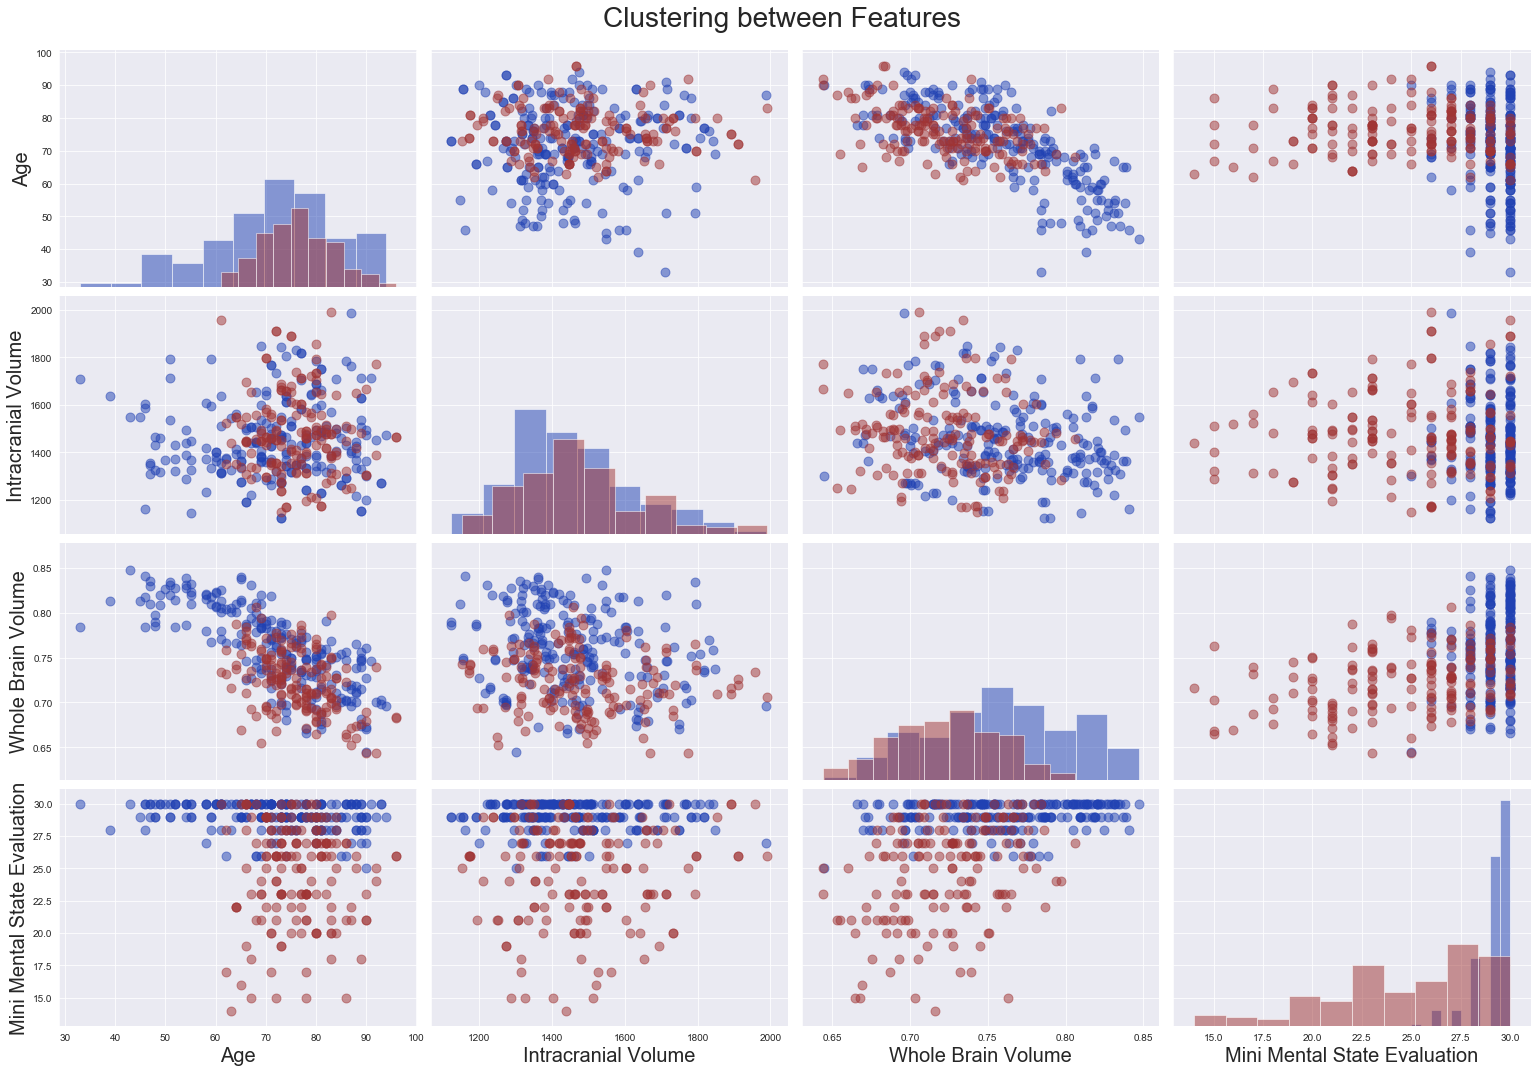

In [14]:
DataVisualization.pair_plot(df)

##### Discussion

We note the most prominent differences in clustering for plots where Mini Mental State Evaluation scores are included. This implies that this features will likely play a significant role in our predictive models. We also are able to note a rough negative correlation between age and normalized whole brain volume.  

---

<a id="predictions"></a>

## Making Predictions

<a id="prep"></a>

### Data Preparation

We must first prepare our data to be suitable for building our predictive models upon. To do so we will:

- Limit our data to only use our desired features:
    - Sex
    - Age
    - Years of education
    - Economic status
    - Estimated intracranial volume
    - Estimated total brain volume
    - Mini Mental State Examination

- Split our DataFrame into the feature matrix, `X`, and target vector, `y`.

- Normalize the columnular data in our feature matrix between 0 and 1.

- Split our feature matrix and target vector into a training set of `X_train` and `y_train` and a test set of `X_test` and `y_test` with a 70/30 split.

##### Split our DataFrame into the normalized feature matrix and target vector

In [15]:
X, y = PredictiveModel.feature_target_split(df)

##### Split our data into training and testing sets with a 70/30 split

In [16]:
(X_train, X_test, y_train, y_test) = PredictiveModel.split(X, y)

<a id="logreg"></a>

### Logistic Regression 

We will first attempt to use a logistic regression model to classify our subjects. Logistic regression is a good start for our binary classification problem due to its light use of resources and little hyperparamters available to tune. In this case we will use *scikit-learn*'s default parameters to train our model on `X_train` and `y_train` before making predictions on `X_test`. These will be compared to our test target vector, `y_test`. Finally, we will use common statistical plots to infer on the effectiveness of our model.

##### Train the model on our training data and make predictions on our test data

In [17]:
logistic_regression = PredictiveModel.logistic_regression(X_train, X_test, y_train, y_test)

Logistic Regression Accuracy:  0.8275862068965517


##### Create and display the receiver operating characteristic curve for this model

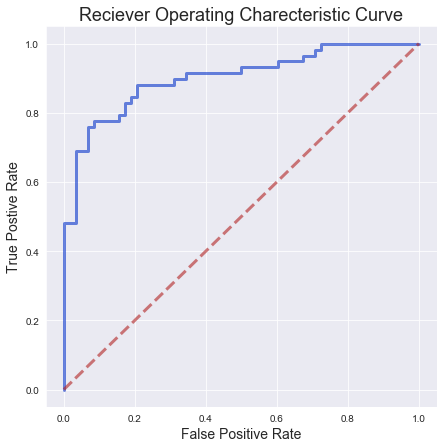

In [18]:
ResultsVisualization.roc_plot(logistic_regression, X_test, y_test)

##### Create and display the confusion matrix for this model

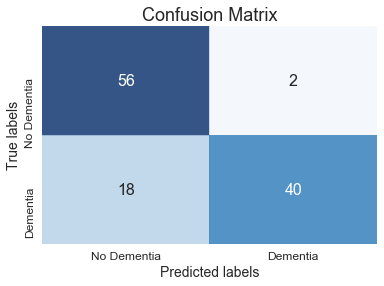

In [19]:
ResultsVisualization.confusion_matrix(logistic_regression, X_test, y_test)

##### Discussion

Our logistic regression classifier had an accuracy of 82.76% on our testing data - not bad for our first model! The confusion matrix presented for this model shows a high number of false negatives at 18 and a very low number of false positives at 2.

<a id="svc"></a>

### Support Vector Classifier 

The next model we will fit to our data will be a Support Vector Classifier (SVC). SVCs usually work well with datasets containing a high number of features and are less prone to overfitting compared to other models. We will modify *scikit-learn*'s default hyperparameters by setting *kernel* to *poly* and *C* to *0.5*. We will then make predictions and analyze as prior.

##### Train the model on our training data and make predictions on our test data

In [20]:
svc = PredictiveModel.svc(X_train, X_test, y_train, y_test)

SVC Accuracy:  0.853448275862069


##### Create and display the receiver operating characteristic curve for this model

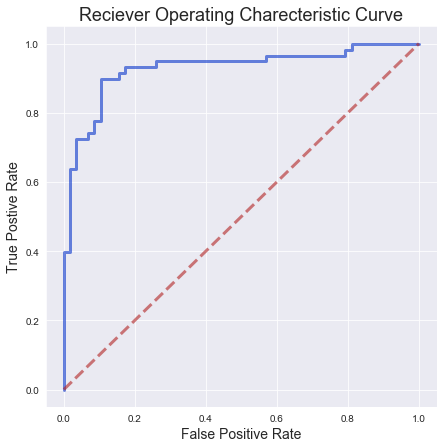

In [21]:
ResultsVisualization.roc_plot(svc, X_test, y_test)

##### Create and display the confusion matrix for this model

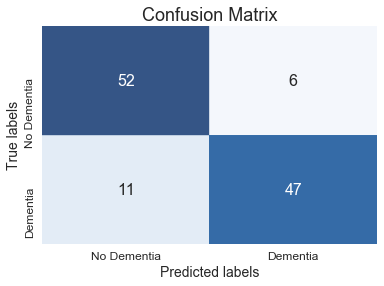

In [22]:
ResultsVisualization.confusion_matrix(svc, X_test, y_test)

##### Discussion

Our SVC model with the given hyperparamters returned an accuracy of 85.34% on our test data - an increase from our logistic regression classifier. We also note a lower number of false negatives at 11 at the trade-off of higher false positives.


<a id="rfc"></a>

### Random Forest Classifier

The final model we will fit to our data is a random forest classifier. This powerful ensemble model will be implemented using *scikit-learn*'s default parameters. In addition to the prior evaluation techniques, we will also investigate the  relative importance of our data's features.

##### Train the model on our training data and make predictions on our test data

In [23]:
random_forest = PredictiveModel.random_forest(X_train, X_test, y_train, y_test)

Random Forest Accuracy:  0.8706896551724138


##### Create and display the receiver operating characteristic curve for this model

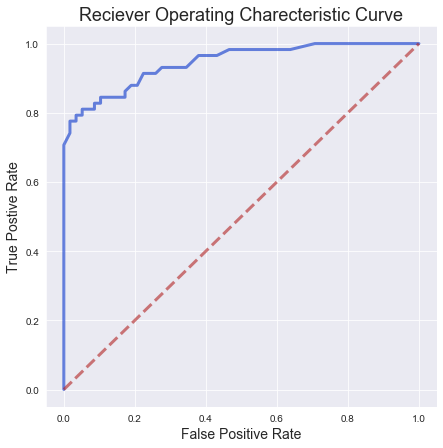

In [24]:
ResultsVisualization.roc_plot(random_forest, X_test, y_test)

##### Create and display the confusion matrix for this model

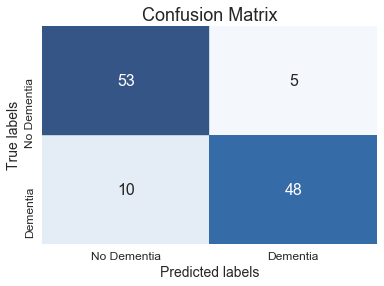

In [25]:
ResultsVisualization.confusion_matrix(random_forest, X_test, y_test)

##### Examine the feature importances of this model

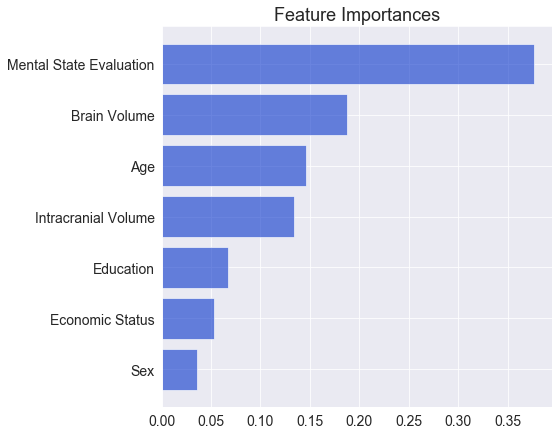

In [26]:
ResultsVisualization.feature_importance_plot(random_forest)

##### Discussion

Our Random Forest Classifier returned the highest accuracy on our test data at 87.10%. We also note the lowest number of false negatives of any of our models at 10. Our model placed the highest importance on a participant's Mini Mental State Evaluation score when making predictions. This was followed by a participant's normalized whole brain volume, age, and estimated intracranial volume. Education, economic state, and sex played a more negligible role in the predictions.


---

<a id="conclusions"></a>

## Conclusions

<a id="findings"></a>

### Findings

After properly cleaning and formatting our data, we were able to build three moderately accurate models capable of predicting dementia on our test dataset. Our most accurate model, a random forest classifier, was able to predict dementia with an 87% accuracy. This model's feature importance plot enforced the importance of Mini Mental State Evaluation scores in predicting dementia. Brain volume, age, and intracranial volume were also important in accurately predicting dementia in our participants. Regardless of which of our three constructed models are used they all fall prey to false negatives. These dangerous false negatives could lead to delayed intervention for those in need.

<a id="limitations"></a>

### Limitations

The analysis completed here is admittedly very limited and would need significant modifications before any concrete conclusions could be made. Our datasets lack certain features that could aid in prediction. Information on a participants' race and family history for disease could provide important insight and help enforce current results in the field. Also, with our data only coming from 384 participants, it is difficult to make any wide generalization until significantly more data can be analyzed. 

<a id="further"></a>

### Further Research

Using a more robust dataset containing features discussed prior to build predictive models could lead to higher accuracies. Further modification to the hyperparamters or utilization of different types of models entirely could also increase accuracy and minimize the amount of false negatives our models gave.

---
